# Model Overfitting

In [1]:
%pip install matplotlib scikit-learn pydotplus ipython

Note: you may need to restart the kernel to use updated packages.


## Demonstrate overfitting

In [2]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import make_classification # generates synthetic data for classification
from sklearn.model_selection import train_test_split 

### Demonstrate overfitting with make_classification
#### Generate and display 2D data

In [3]:
X,y = make_classification(n_samples=500, n_features=2,n_informative=2, n_redundant=0, n_classes=2,n_clusters_per_class=2,random_state=1)

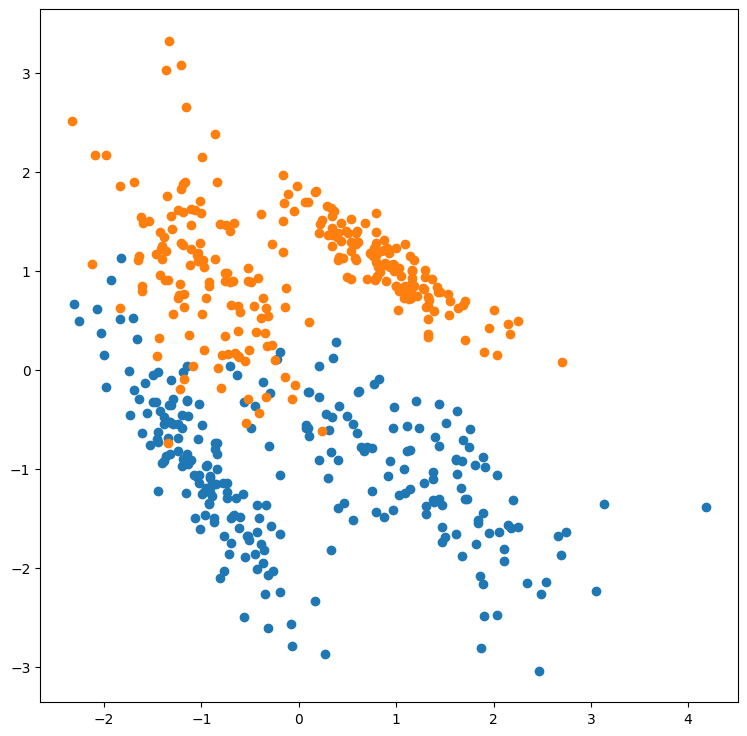

In [4]:
plt.figure(figsize=(9,9))
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

#### Train Decision Tree & test on Training Set

In [5]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X,y)
print(f"Classification Accuracy: {tree_model.score(X,y):2.2f}")

Classification Accuracy: 1.00


#### Split data and split into train and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=1)

In [7]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
#y_predict =  tree_model.predict(X_text)
print(f"Training Set Classification Accuracy: {tree_model.score(X_train,y_train):2.2f}")
print(f"Test Set Classification Accuracy: {tree_model.score(X_test,y_test):2.2f}")

Training Set Classification Accuracy: 1.00
Test Set Classification Accuracy: 0.92


In [8]:
#!pip install pydotplus

In [9]:
def display_tree(tree_model):
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    from IPython.display import Image
    import pydotplus

    dot_data = tree.export_graphviz(tree_model, out_file=None,
                             filled=True, rounded=True,  
                             special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    return Image(graph.create_png())

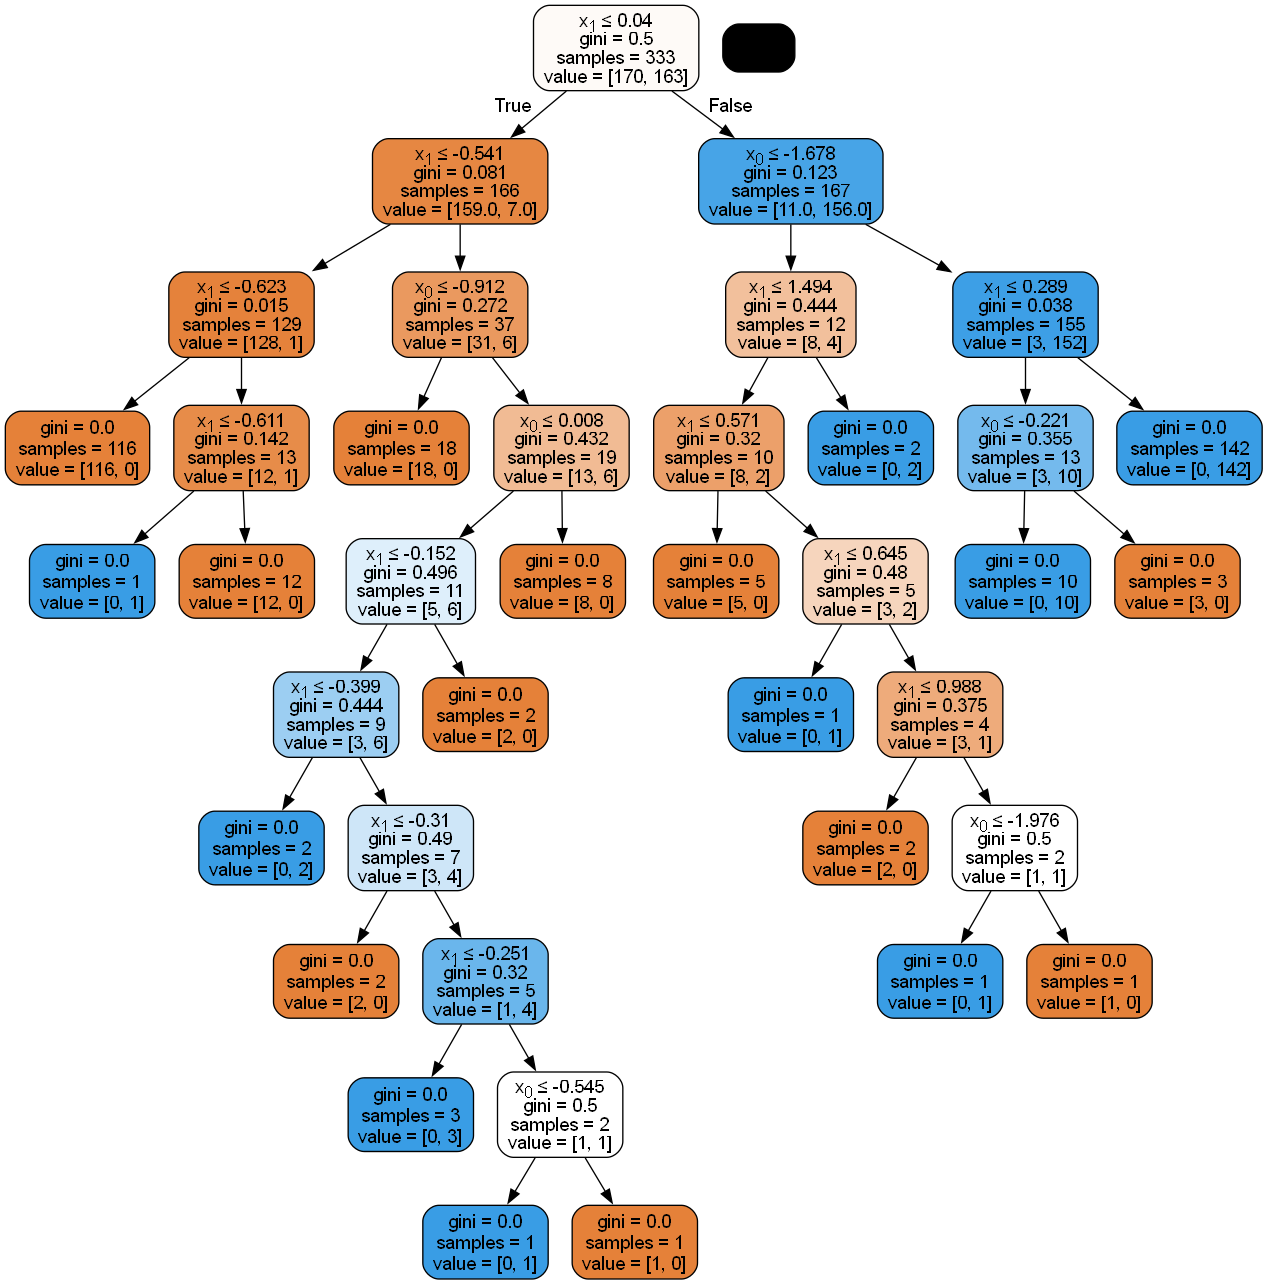

In [10]:
display_tree(tree_model) 

#### Limit Tree deapth to avoid overfitting:
- traint test accuracy drops
- test set accuracy is not hurt (can even improve)

Training Set Classification Accuracy: 0.96
Test Set Classification Accuracy: 0.95


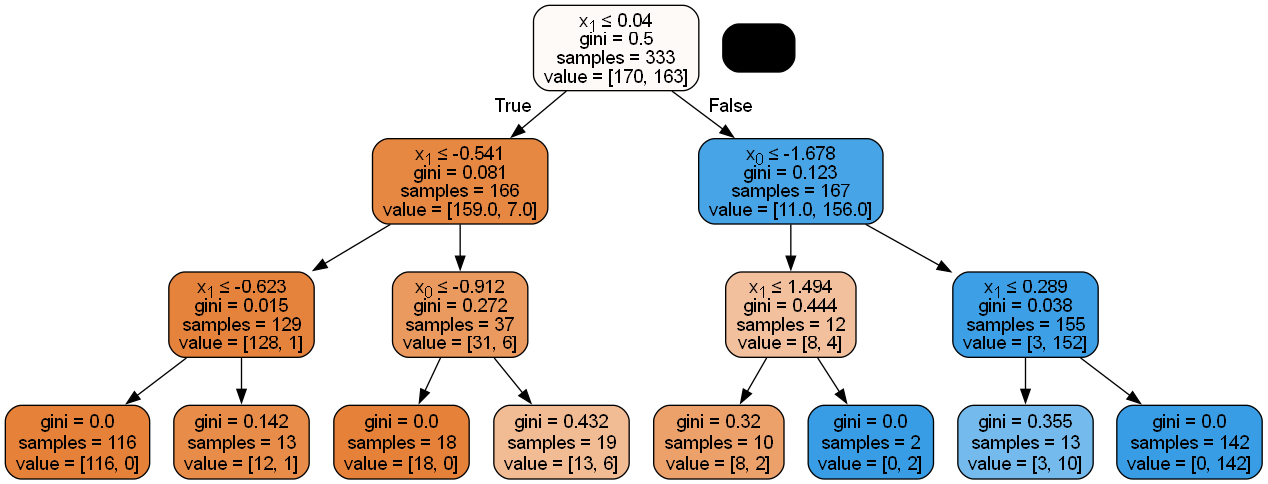

In [11]:
# generate data
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=500, n_features=2,n_informative=2, n_redundant=0, n_classes=2,n_clusters_per_class=2,random_state=1)
# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=1)
# train Decision Tree Classifier
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = 3)
tree_model.fit(X_train,y_train)
# test the classifier
print(f"Training Set Classification Accuracy: {tree_model.score(X_train,y_train):2.2f}")
print(f"Test Set Classification Accuracy: {tree_model.score(X_test,y_test):2.2f}")

# display the tree
display_tree(tree_model)

### Overfitting and underfitting with more complex data
- Train trees with multiple values of tree deapth

#### Prepare the data

In [12]:
# generate data
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=15000, n_features=20,n_informative=15, n_redundant=5, n_classes=2,n_clusters_per_class=2,random_state=1)
# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=1)

#### How many levels a tree classifier would like to have? 

In [13]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

print(f"Training Set Classification Accuracy: {tree_model.score(X_train,y_train):2.2f}")
print(f"Test Set Classification Accuracy: {tree_model.score(X_test,y_test):2.2f}")

print(f"The tree has {tree_model.get_n_leaves()} leafs, {tree_model.tree_.node_count} nodes and deapth of {tree_model.get_depth()} ")


Training Set Classification Accuracy: 1.00
Test Set Classification Accuracy: 0.88
The tree has 601 leafs, 1201 nodes and deapth of 19 


#### Display tree

In [14]:
# display the tree
display_tree(tree_model) 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.934118 to fit



### Iterate over different tree deapths

In [15]:
from sklearn import tree

train_accuracy, test_accuracy, deapths, nodes, leafs = [], [], [], [], []


for max_depth in range(1, 19):
    tree_model = tree.DecisionTreeClassifier(max_depth=max_depth)
    tree_model.fit(X_train,y_train)
    
    deapths.append( tree_model.get_depth())
    nodes.append( tree_model.get_n_leaves())
    leafs.append( tree_model.tree_.node_count)
    
    train_accuracy.append( tree_model.score(X_train, y_train) )
    test_accuracy.append( tree_model.score(X_test, y_test) )
    

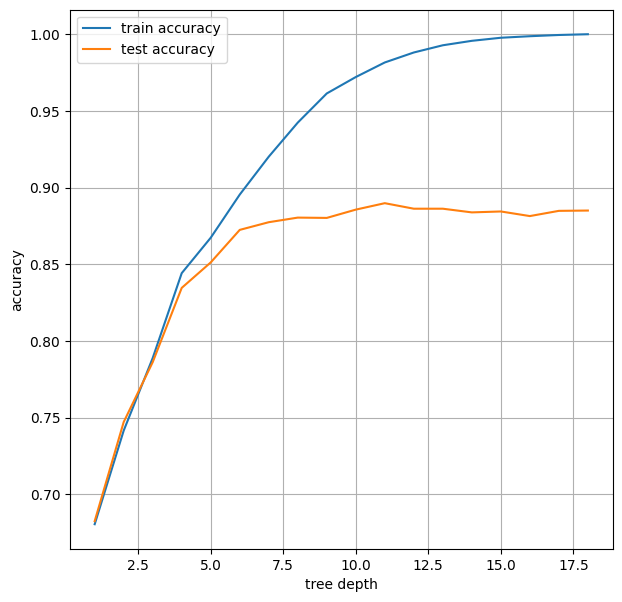

In [18]:
fig= plt.figure(figsize=(7,7) )

plt.plot(deapths,train_accuracy, label='train accuracy')
plt.plot(deapths,test_accuracy, label='test accuracy')
plt.xlabel('tree depth'); plt.ylabel('accuracy')
plt.legend(); plt.grid(True)

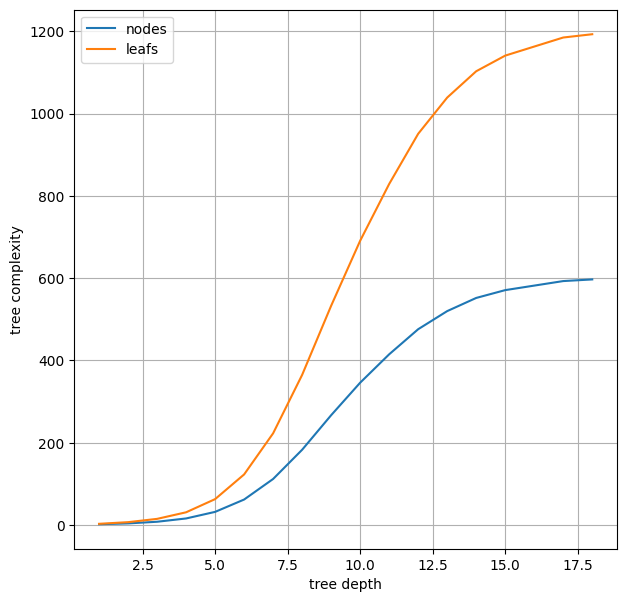

In [19]:
fig= plt.figure(figsize=(7,7) )

plt.plot(deapths,nodes, label='nodes')
plt.plot(deapths,leafs, label='leafs')
plt.xlabel('tree depth'); plt.ylabel('tree complexity')
plt.legend(); plt.grid(True)

## Ways to control tree complexity
- max_depth
- min_samples_split - The minimum number of samples required to split an internal node
- min_samples_leaf - The minimum number of samples required to be at a leaf node
- max_leaf_nodes
- min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value